
Total count for 00 and 11 are: {'00': 529, '11': 471}


/home/hiro/qiskit-tutorial/venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


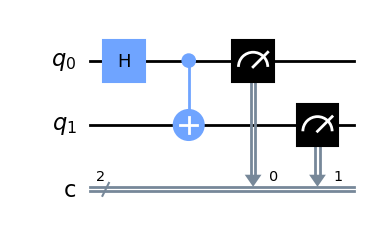

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Use Aer's AerSimulator
simulator = AerSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0, 1], [0, 1])

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)

# Draw the circuit
circuit.draw("mpl")

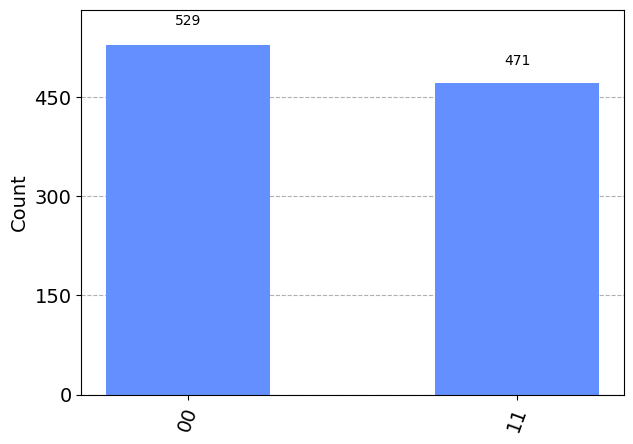

In [3]:
plot_histogram(counts)